# ТЕМА 3. ОБНАРУЖЕНИЕ ВРЕДОНОСНОГО ПРОГРАММНОГО ОБЕСПЕЧЕНИЯ (ВПО).
Подготовили студенты группы ББМО-01-23
- Чурсинов Герман
- Бакин Даниил

# Выбираем необходимый датасет, проводим его анализ с визуализацией.

Установка необходимых библиотек

In [68]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os

Скачиваем датасет

In [69]:
# Работа выполнялась в среде Google Colab, поэтому процесс разархивирования написан для этой среды
!wget https://github.com/aleguma/kronodroid/archive/refs/heads/main.zip
!unzip -o main.zip && rm main.zip
!unzip -o /content/kronodroid-main/emulator/emu_legitimate_v1.zip -d /content/
!unzip -o /content/kronodroid-main/emulator/emu_malware_v1.zip -d /content/
!unzip -o /content/kronodroid-main/real_device/real_legitimate_v1.zip -d /content/
!unzip -o /content/kronodroid-main/real_device/real_malware_v1.zip -d /content/
!rm -rf kronodroid-main

--2024-04-16 22:02:37--  https://github.com/aleguma/kronodroid/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/aleguma/kronodroid/zip/refs/heads/main [following]
--2024-04-16 22:02:38--  https://codeload.github.com/aleguma/kronodroid/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [     <=>            ]  24.49M  24.7MB/s    in 1.0s    

2024-04-16 22:02:39 (24.7 MB/s) - ‘main.zip’ saved [25682671]

Archive:  main.zip
35b862c9ce368baafb71851d2871e0b1cf54cb59
   creating: kronodroid-main/
  inflating: kronodroid-main/README.md  
   creating: kron

# 2. Проводим анализ с визуализацией



Оставляем один из двух типов сырых данных

In [70]:
# dataset = 'real'
dataset = 'emu'

Соединяем два файла (legitmate и malware) в один DataFrame

In [71]:
df = pd.concat([pd.read_csv(f'/content/{dataset}_legitimate_v1.csv'), pd.read_csv(f'/content/{dataset}_malware_v1.csv')], ignore_index=True)
df.describe()

,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,...,NrIntServices,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio
count,63991.000000,63991.0,63991.000000,63991.000000,63991.000000,63991.000000,63991.0,63991.0,63991.0,63991.000000,...,63682.000000,63682.000000,63682.000000,63682.000000,63682.000000,63682.000000,63681.000000,63682.000000,63991.000000,63991.000000
mean,0.449204,0.0,736.916238,0.000516,1.127315,0.001375,0.0,0.0,0.0,0.000625,...,0.308737,0.368362,2.049559,2.241403,0.308737,2.721004,3.889716,1.429399,64.644434,0.212932
std,0.497417,0.0,7119.980542,0.030360,14.573641,0.085691,0.0,0.0,0.0,0.050000,...,2.092313,2.459410,8.305416,8.612197,2.092313,8.861167,13.738739,3.823711,1.637823,0.236593
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,0.000000
25%,0.000000,0.0,37.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,64.000000,0.000000
50%,0.000000,0.0,149.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,65.000000,0.015385
75%,1.000000,0.0,696.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.000000,66.000000,0.461538
max,1.000000,0.0,548944.000000,3.000000,2731.000000,10.000000,0.0,0.0,0.0,4.000000,...,414.000000,414.000000,329.000000,373.000000,414.000000,1216.000000,524.000000,414.000000,68.000000,0.910448


In [72]:
# Предобработка данных
df = df.drop(df.select_dtypes(include=['object']).columns.tolist(), axis=1)  # Очистка лишних столбцов (тех, что не численные)
df.fillna(0, inplace=True)  # Значения NaN превращает в нули
df

,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,...,NrIntServices,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio
0,0,0,74,0,3,0,0,0,0,0,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,66,0.000000
1,0,0,230,0,0,0,0,0,0,0,...,2.0,2.0,4.0,5.0,2.0,6.0,10.0,3.0,61,0.000000
2,0,0,100,0,0,0,0,0,0,0,...,0.0,0.0,1.0,3.0,0.0,4.0,4.0,3.0,66,0.000000
3,0,0,113,0,0,0,0,0,0,0,...,0.0,0.0,3.0,3.0,0.0,2.0,5.0,1.0,65,0.000000
4,0,0,4,0,0,0,0,0,0,0,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,65,0.046154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63986,1,0,622,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,66,0.333333
63987,1,0,594,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,8.0,3.0,1.0,65,0.461538
63988,1,0,659,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.484848
63989,1,0,44,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,66,0.409091


Визуализация меток о вредоносном ПО

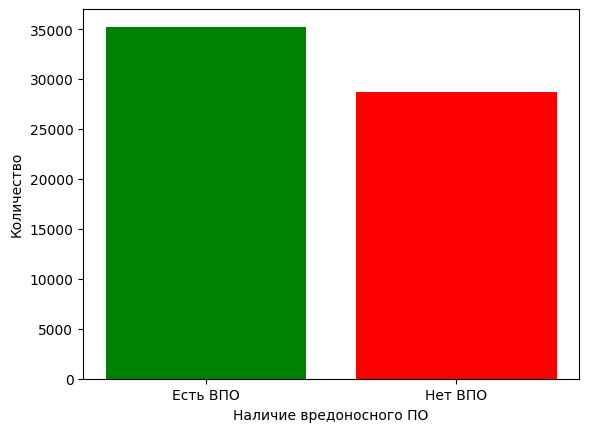

In [73]:
df_distrib = df['Malware'].value_counts()
x, y = df_distrib.keys(), df_distrib.values
verbose_xticks = ["Есть ВПО", "Нет ВПО"]
plt.xticks([0,1], verbose_xticks)
plt.xticks(rotation=0)
plt.xlabel('Наличие вредоносного ПО')
plt.ylabel('Количество')
plt.bar(x,y)
plt.bar(x,y, color = ['green', 'red'])
plt.show()

# 3. Выбираем признаки для МО


In [74]:
data_X, data_y = df.drop('Malware', axis=1), df['Malware']
print(data_X.shape, data_y.shape)

(63991, 478) (63991,)


# 4. Обучаем модель, проводим кроссвалидацию


Делим выборки на обучающую и тестовую

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

Создаем модель

In [76]:
model = RandomForestClassifier(random_state=42, oob_score=True, max_depth = 12)

Обучаем модель

In [77]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=42)

Прогнозируем

In [78]:
y_pred = model.predict(X_test)

# Подготавливаем ноутбук с результатами и оценками по метрикам (accuracy, precision, recall, f1-measure)

Подсчёт classification report

In [79]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-measure: {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.99968747558403
Precision: 1.0
Recall: 0.9993021632937893
F1-measure: 0.999650959860384
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7067
           1       1.00      1.00      1.00      5732

    accuracy                           1.00     12799
   macro avg       1.00      1.00      1.00     12799
weighted avg       1.00      1.00      1.00     12799



Подсчёт confusion matrix

[[7067    0]
 [   4 5728]]


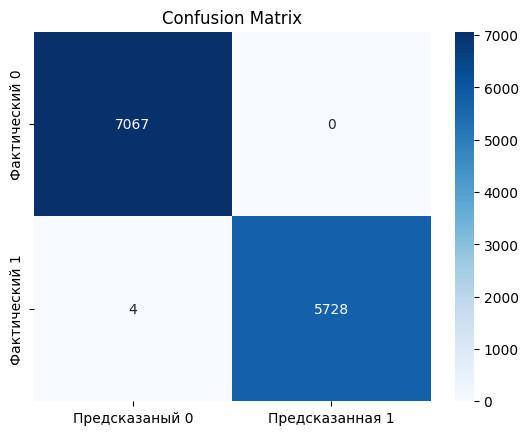

In [80]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Предсказаный 0', 'Предсказанная 1'], yticklabels=['Фактический 0', 'Фактический 1'])
plt.title('Confusion Matrix')
plt.show()

Важность признаков

In [81]:
feature_weights = model.feature_importances_
feature_info = [(i+1, abs(weight), f'Feature {i+1}') for i, weight in enumerate(feature_weights)]
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

print("№ признака | Абсолютная величина веса (важность) | Название признака")
for rank, (feature_num, weight, feature_name) in enumerate(sorted_feature_info[:20]):
    print(f"{rank+1}. {feature_num} | {weight: .4e} | {df.columns[rank]}")

№ признака | Абсолютная величина веса (важность) | Название признака
1. 465 |  2.4304e-01 | Malware
2. 478 |  1.8363e-01 | execve
3. 400 |  5.7748e-02 | getuid32
4. 458 |  3.6744e-02 | getgid32
5. 462 |  3.3671e-02 | geteuid32
6. 421 |  2.4657e-02 | getegid32
7. 476 |  2.2722e-02 | getresuid32
8. 456 |  2.2638e-02 | getresgid32
9. 474 |  2.0343e-02 | readahead
10. 466 |  1.9133e-02 | getgroups32
11. 457 |  1.5224e-02 | getpgid
12. 407 |  1.4136e-02 | getppid
13. 65 |  1.2914e-02 | getsid
14. 299 |  1.2782e-02 | setsid
15. 475 |  1.0838e-02 | setgid32
16. 152 |  1.0785e-02 | setuid32
17. 450 |  9.7922e-03 | setreuid32
18. 409 |  9.4680e-03 | setresuid32
19. 436 |  8.5585e-03 | setresgid32
20. 445 |  8.0633e-03 | brk


Визуализация важности признаков

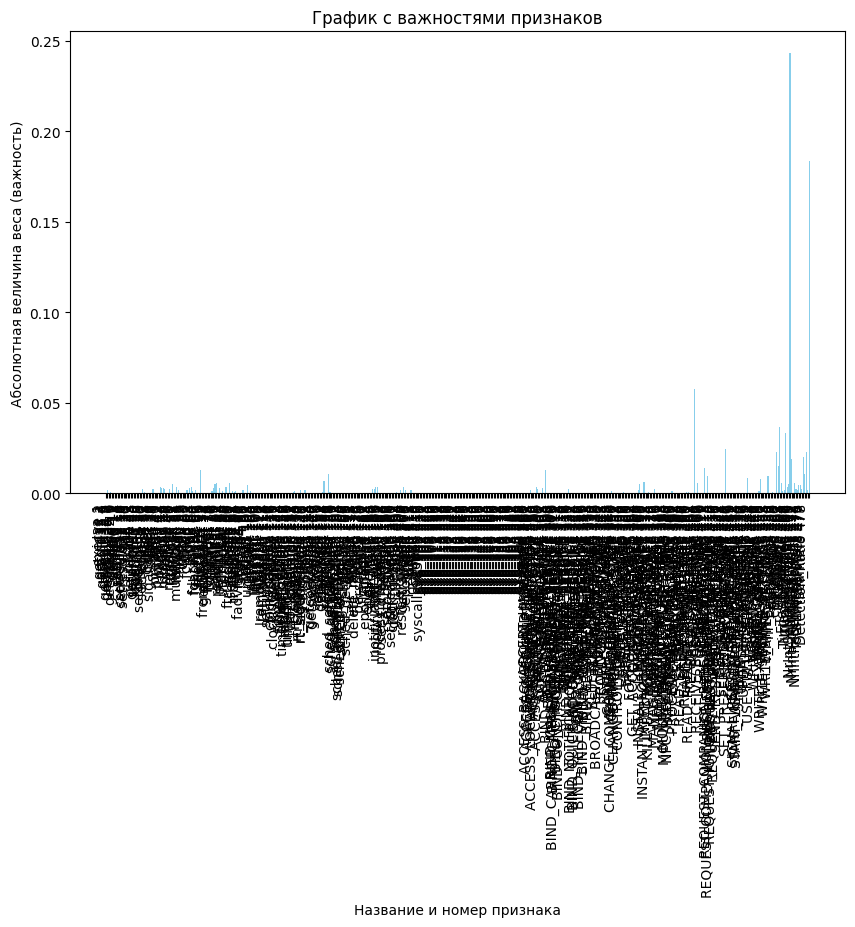

In [82]:
absolute_weights = [abs(weight) for weight in feature_weights]
feature_numbers = range(1, len(absolute_weights) + 1)

sorted_weights, sorted_numbers = zip(*sorted(zip(absolute_weights, feature_numbers), reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_numbers, sorted_weights, tick_label=sorted_numbers, color='skyblue')
plt.xlabel('Название и номер признака')
plt.xticks(rotation=90)
plt.xticks(sorted_numbers, [f'{df.columns[num]} {num}' for num in sorted_numbers], rotation=90, ha='right') # ЭТА СТРОЧКА ДОБАВЛЯЕТ НАЗВАНИЯ ПРИЗНАКОВ НА ГРАФИК (получается очень много текста)
plt.ylabel('Абсолютная величина веса (важность)')
plt.title('График с важностями признаков')
plt.show()

Визуализация топ 20 признаков

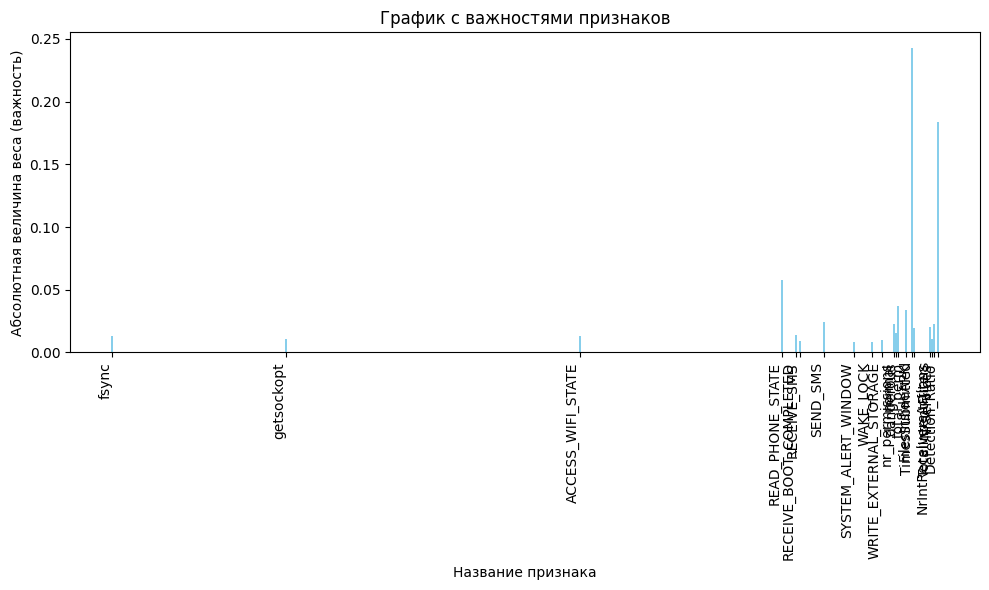

In [83]:
sorted_weights = sorted_weights[:20]
sorted_numbers = sorted_numbers[:20]

# Создаем график
plt.figure(figsize=(10, 6))
plt.bar(sorted_numbers, sorted_weights, tick_label=sorted_numbers, color='skyblue')
plt.xlabel('Название признака')
plt.xticks(rotation=90)
plt.xticks(sorted_numbers, [f'{df.columns[num]}' for num in sorted_numbers], rotation=90, ha='right')
plt.ylabel('Абсолютная величина веса (важность)')
plt.title('График с важностями признаков')

plt.tight_layout()

plt.show()